# From here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

In [3]:
EU_milk = pd.read_pickle('data/eu.pickle')
US_milk = pd.read_pickle('data/us.pickle')
china_milk = pd.read_pickle('data/cn.pickle')
fred_series = pd.read_pickle('data/fred.pickle')

# US

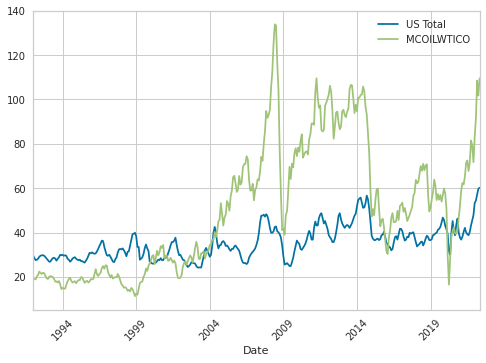

In [6]:
data = US_milk.join(fred_series)
data.loc['1992-01-01':,['US Total', 'MCOILWTICO']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [12]:
US_states = ['California', 'Wisconsin', 'Idaho', 'Texas', 'New York', 'Michigan', 'Minnesota', 'Pennsylvania', 'New Mexico', 'Washington', 'US Total']
fred_list = ['MCOILBRENTEU', 'MCOILWTICO', 'MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO']

In [11]:
corr_US_states = data[US_states].corr()
corr_US_states.style.background_gradient(cmap='coolwarm')

,California,Wisconsin,Idaho,Texas,New York,Michigan,Minnesota,Pennsylvania,New Mexico,Washington,US Total
California,1.000000,0.967585,0.979449,0.975368,0.957858,0.943879,0.965985,0.947513,0.967019,0.978821,0.984640
Wisconsin,0.967585,1.000000,0.985897,0.974189,0.975694,0.958376,0.996371,0.969562,0.970965,0.974812,0.990022
Idaho,0.979449,0.985897,1.000000,0.969515,0.958717,0.934653,0.985087,0.945293,0.950709,0.971418,0.984173
Texas,0.975368,0.974189,0.969515,1.000000,0.981540,0.969691,0.968573,0.974527,0.990463,0.984876,0.991342
New York,0.957858,0.975694,0.958717,0.981540,1.000000,0.982754,0.968456,0.994131,0.981416,0.986983,0.989009
Michigan,0.943879,0.958376,0.934653,0.969691,0.982754,1.000000,0.949200,0.985851,0.975303,0.969737,0.976907
Minnesota,0.965985,0.996371,0.985087,0.968573,0.968456,0.949200,1.000000,0.962614,0.965552,0.968521,0.985621
Pennsylvania,0.947513,0.969562,0.945293,0.974527,0.994131,0.985851,0.962614,1.000000,0.981546,0.980726,0.982715
New Mexico,0.967019,0.970965,0.950709,0.990463,0.981416,0.975303,0.965552,0.981546,1.000000,0.978317,0.985841
Washington,0.978821,0.974812,0.971418,0.984876,0.986983,0.969737,0.968521,0.980726,0.978317,1.000000,0.991924


In [15]:
corr_US_fred = data[fred_list + ['US Total']].corr()
corr_US_fred.style.background_gradient(cmap='coolwarm')

,MCOILBRENTEU,MCOILWTICO,MHHNGSP,PBARLUSDM,PMAIZMTUSDM,PNGASEUUSDM,PSOYBUSDM,PWHEAMTUSDM,IPG32411S,A33DNO,US Total
MCOILBRENTEU,1.000000,0.989996,0.277150,0.834550,0.822712,0.804317,0.832716,0.778490,0.692345,0.880839,0.722379
MCOILWTICO,0.989996,1.000000,0.369242,0.817999,0.778055,0.808053,0.805417,0.766447,0.687561,0.863993,0.702532
MHHNGSP,0.277150,0.369242,1.000000,0.231240,-0.024848,0.300470,-0.029011,0.198577,0.095066,0.128988,0.028588
PBARLUSDM,0.834550,0.817999,0.231240,1.000000,0.887843,0.743825,0.810264,0.859657,0.441655,0.751877,0.562837
PMAIZMTUSDM,0.822712,0.778055,-0.024848,0.887843,1.000000,0.719336,0.933460,0.869414,0.476939,0.773221,0.653090
PNGASEUUSDM,0.804317,0.808053,0.300470,0.743825,0.719336,1.000000,0.710610,0.726863,0.565890,0.748317,0.549518
PSOYBUSDM,0.832716,0.805417,-0.029011,0.810264,0.933460,0.710610,1.000000,0.843770,0.528622,0.793396,0.705118
PWHEAMTUSDM,0.778490,0.766447,0.198577,0.859657,0.869414,0.726863,0.843770,1.000000,0.363434,0.730145,0.614907
IPG32411S,0.692345,0.687561,0.095066,0.441655,0.476939,0.565890,0.528622,0.363434,1.000000,0.652592,0.517830
A33DNO,0.880839,0.863993,0.128988,0.751877,0.773221,0.748317,0.793396,0.730145,0.652592,1.000000,0.662714


## From 1992 to May 2022

In [28]:
limits = [['1992-01-01','2022-05-31']]
indicators = ['MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO']

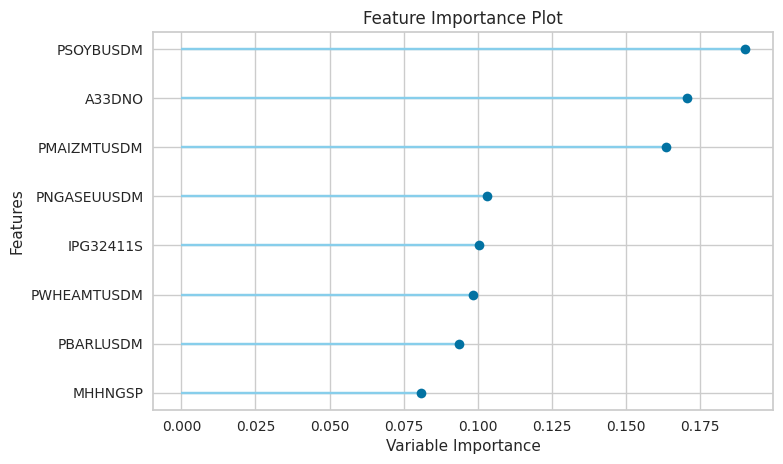

In [29]:
for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 1992 to May 2022')
    best = compare_models(fold=5)
    best.get_params()
    plot_model(best)
    plot_model(best, plot='feature')

## From May 2004 to May 2022

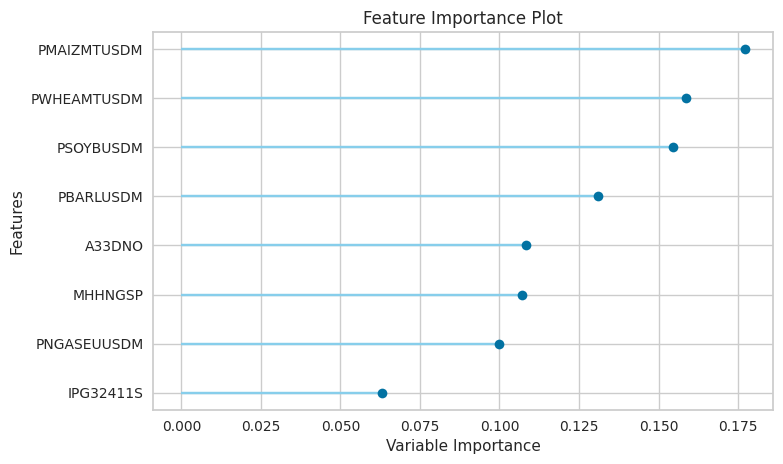

In [31]:
limits = [['2004-05-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from May 2004 to May 2022')
    best = compare_models(fold=5)
    best.get_params()
    plot_model(best)
    plot_model(best, plot='feature')

## From April 2015 to May 2022

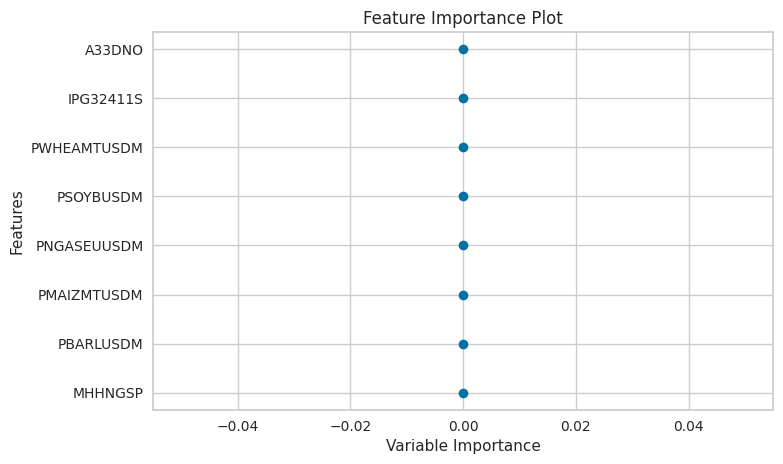

In [32]:
limits = [['2015-04-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from April 2015 to May 2022')
    best = compare_models(fold=5)
    best.get_params()
    plot_model(best)
    plot_model(best, plot='feature')